In [22]:
import pandas as pd 
import numpy as np 
from scipy.stats import mode
import json
import gc

import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter, FormatStrFormatter
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib import dates as mdates

from tqdm.notebook import tqdm

In [5]:
# set plotting parameters
font_dir = "../fonts/"
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

title_font = FontProperties()
title_font.set_name("Lora")
title_font.set_size(16)

main_font = FontProperties()
main_font.set_name("Quicksand")
main_font.set_size(12)
main_font.set_weight(weight = "light")

palate = {
    "forest":"#296939",
    "navy":"#395481",	
    "deep":"#407ee4",	
    "turq":"#52b5b6",
    "money":"#73bf86"
}

In [2]:
zip_to_geo_mapping = pd.read_csv("../data/Zip9_geoid_mapping.csv")
zip_to_geo_mapping["zip5"] = zip_to_geo_mapping["Zip9"].apply(lambda z: str(z)[:5]).astype("int")
zip_to_geo_mapping = zip_to_geo_mapping.set_index("Zip9")
# zip_map = {zip9: geoid for zip9, geoid in zip(zip_to_geo_mapping.Zip9, zip_to_geo_mapping.GEOID)}
zip_to_geo_mapping

,GEOID,zip5
Zip9,,
302170800,13149970300,30217
318275147,13263960200,31827
306230226,13211010100,30623
302562250,13231010400,30256
307217539,13313000301,30721
...,...,...
319952466,13215010501,31995
319089662,13215010501,31908
319020201,13215010501,31902


In [3]:
sodh = pd.read_csv("../data/SDoH Extract_Data4Good_v93-001.txt", sep="|",  
    dtype={
        "zip5": "string", 
        "zip4": "string"
    })

null_rows = sodh.isnull().sum(axis=1)
sodh = sodh[~(null_rows>120)].reset_index(drop=True)
sodh = sodh.drop_duplicates().reset_index(drop=True)

sodh["zip4"] = sodh.zip4.fillna("0000")
sodh["zip9"] = sodh.zip5+sodh.zip4
sodh["GEOID"] = sodh.zip9.astype("int").map(zip_to_geo_mapping.GEOID)

gc.collect()
sodh

/var/folders/8x/4h999hfj6s10tjjg3h8s43f40000gn/T/ipykernel_95240/3196895470.py:1: DtypeWarning: Columns (41,42,101,105,119) have mixed types. Specify dtype option on import or set low_memory=False.
  sodh = pd.read_csv("../data/SDoH Extract_Data4Good_v93-001.txt", sep="|",


,zip5,zip4,C_state,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,...,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,zip9,GEOID
0,30002,0002,GA,6.0,3.0,45.0,5.0,1.0,1.0,1.0,...,5.0,3.0,5.0,5.0,3.0,4.0,1.0,1.0,300020002,1.308902e+10
1,30002,0005,GA,5.0,3.0,52.0,7.0,5.0,5.0,5.0,...,6.0,4.0,3.0,4.0,2.0,4.0,5.0,2.0,300020005,1.308902e+10
2,30002,0006,GA,5.0,3.0,46.0,4.0,4.0,5.0,5.0,...,7.0,6.0,5.0,6.0,3.0,4.0,3.0,1.0,300020006,1.308902e+10
3,30002,0009,GA,1.0,1.0,61.0,4.0,6.0,5.0,4.0,...,4.0,4.0,1.0,3.0,5.0,5.0,1.0,1.0,300020009,1.308902e+10
4,30002,0011,GA,5.0,4.0,45.0,4.0,2.0,4.0,3.0,...,5.0,3.0,1.0,2.0,2.0,5.0,2.0,2.0,300020011,1.308902e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876472,39897,2713,GA,4.0,5.0,68.0,2.0,1.0,4.0,4.0,...,6.0,6.0,7.0,7.0,7.0,2.0,6.0,0.0,398972713,1.313195e+10
1876473,39897,2143,GA,4.0,5.0,68.0,2.0,1.0,4.0,4.0,...,6.0,6.0,7.0,7.0,7.0,2.0,6.0,0.0,398972143,1.313195e+10
1876474,39897,3241,GA,4.0,5.0,68.0,2.0,1.0,4.0,4.0,...,6.0,6.0,7.0,7.0,7.0,2.0,6.0,0.0,398973241,1.313195e+10
1876475,39897,2213,GA,4.0,5.0,68.0,2.0,1.0,4.0,4.0,...,6.0,6.0,7.0,7.0,7.0,2.0,6.0,0.0,398972213,1.308797e+10


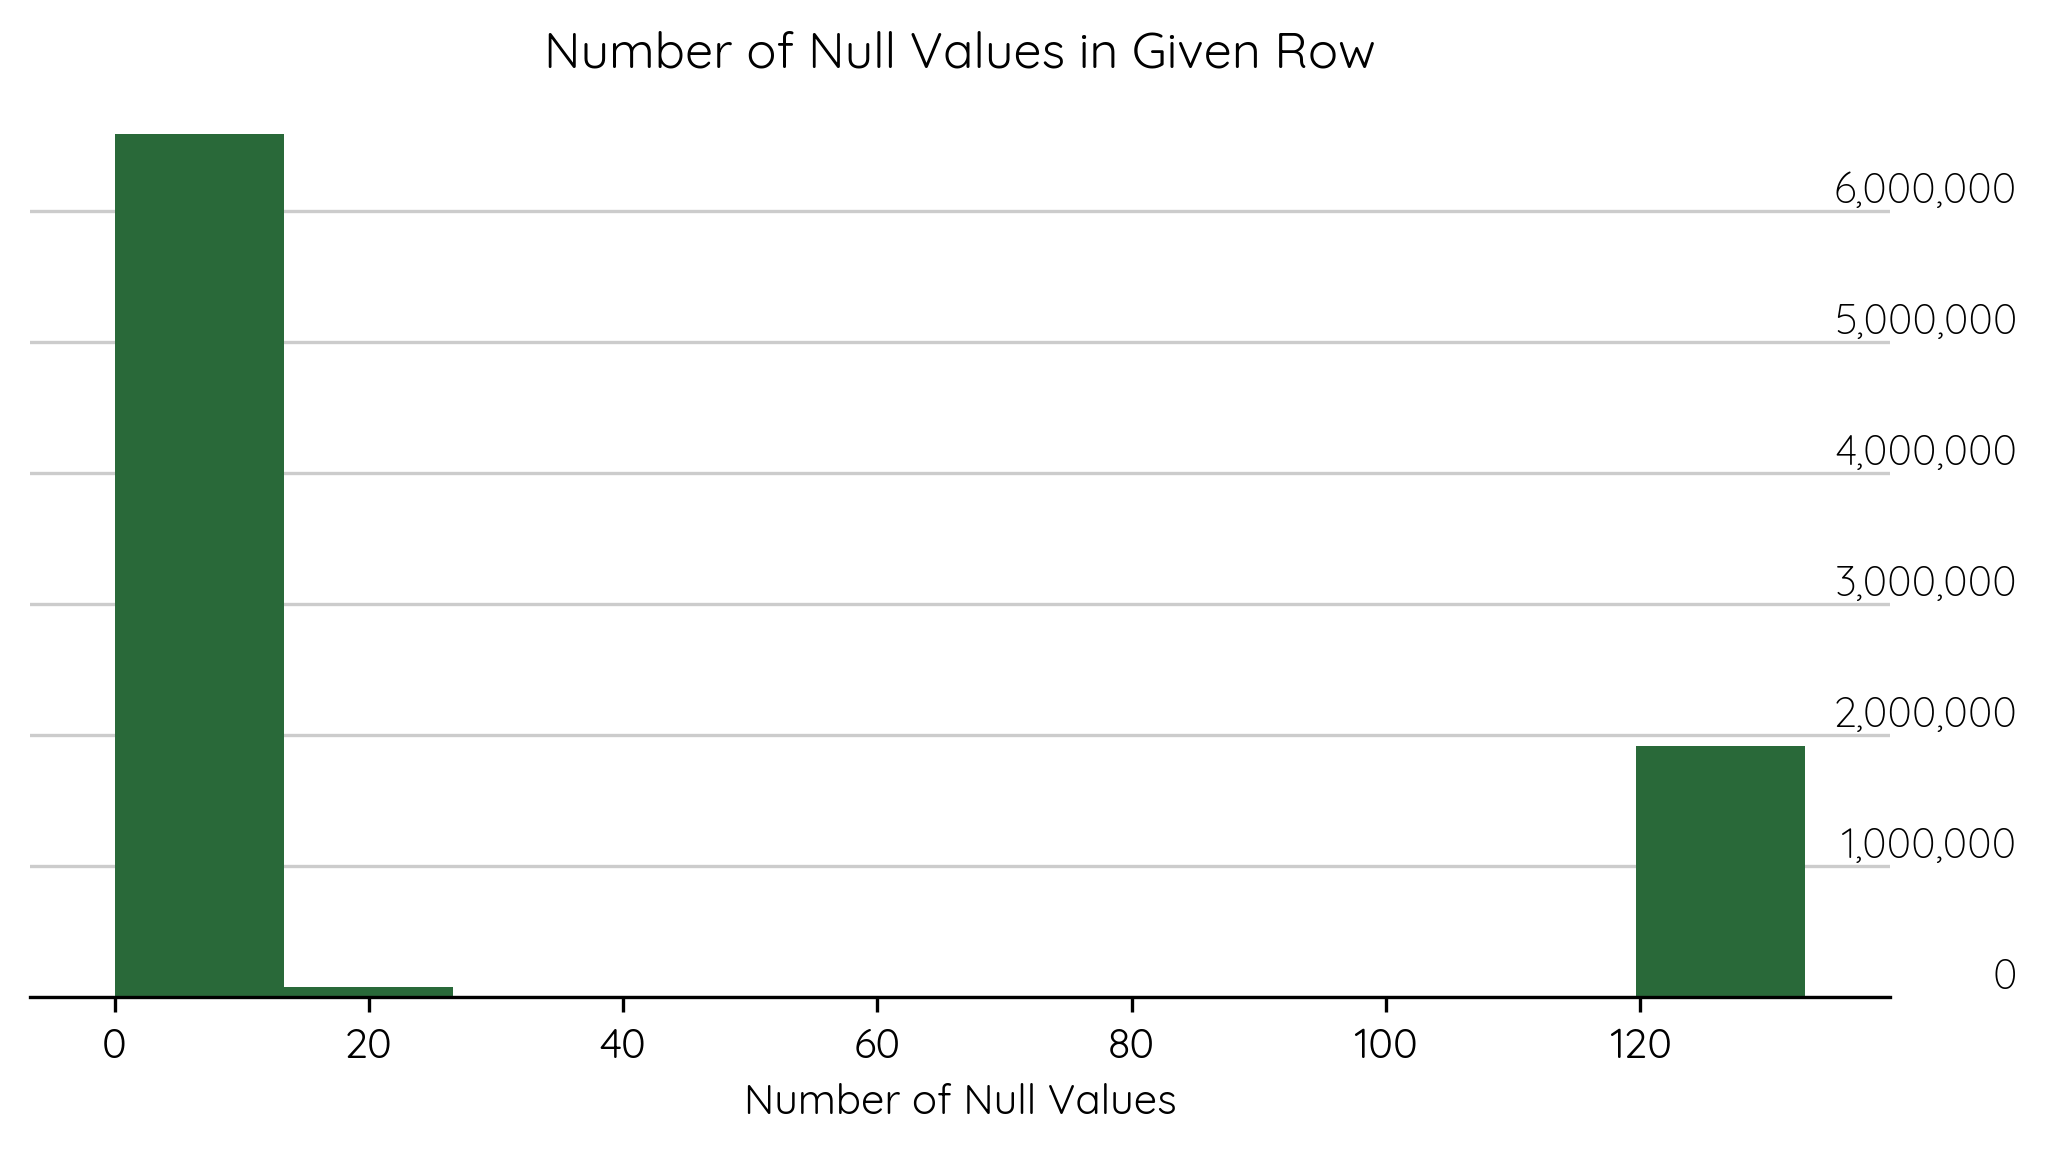

In [7]:
#create plot of null values

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.family"] = main_font.get_name()

fig, ax = plt.subplots()
ax.hist(null_rows, color=palate["forest"],zorder = 2)
ax.spines[["top", "right", "left"]].set_visible(False)

#change grid
ax.grid(color = "gray", alpha = 0.4, axis  = "y", zorder=1)

#find positions
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()

#better y labels
ax.yaxis.set_ticks_position('none')
ax.yaxis.set_ticklabels([])

for label in np.arange(0,  6_000_001, 1_000_000):
    ax.text(right + 10, label, f"{label:,}", 
        color="black", 
        ha= "right", 
        va="bottom",
        font=main_font,
        fontsize = 10)

ax.set_title("Number of Null Values in Given Row")
ax.set_xlabel("Number of Null Values")
plt.savefig("../plots/NullValues.svg")

In [8]:
no_geoid = sodh[sodh.GEOID.isna()]
no_geoid

,zip5,zip4,C_state,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,...,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,zip9,GEOID
1554,30003,2284,GA,3.0,3.0,52.0,3.0,1.0,4.0,4.0,...,6.0,4.0,6.0,5.0,5.0,4.0,3.0,1.0,300032284,NaN
1558,30004,0008,GA,2.0,6.0,82.0,4.0,1.0,7.0,6.0,...,6.0,7.0,6.0,5.0,3.0,2.0,7.0,3.0,300040008,NaN
1559,30004,0009,GA,2.0,5.0,79.0,4.0,1.0,6.0,6.0,...,3.0,6.0,5.0,5.0,3.0,4.0,7.0,3.0,300040009,NaN
1560,30004,0010,GA,3.0,6.0,60.0,3.0,1.0,6.0,5.0,...,5.0,5.0,4.0,5.0,3.0,2.0,5.0,3.0,300040010,NaN
1561,30004,0011,GA,3.0,5.0,63.0,4.0,1.0,7.0,6.0,...,6.0,6.0,5.0,6.0,4.0,4.0,7.0,3.0,300040011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875678,39897,3549,GA,5.0,6.0,39.0,3.0,2.0,5.0,5.0,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0,398973549,NaN
1875835,39897,4041,GA,5.0,4.0,70.0,5.0,2.0,6.0,4.0,...,4.0,4.0,4.0,2.0,2.0,2.0,5.0,2.0,398974041,NaN
1876456,39897,4041,GA,4.0,5.0,68.0,2.0,1.0,4.0,4.0,...,6.0,6.0,7.0,7.0,7.0,2.0,6.0,0.0,398974041,NaN
1876464,39897,3004,GA,4.0,5.0,68.0,2.0,1.0,4.0,4.0,...,6.0,6.0,7.0,7.0,7.0,2.0,6.0,0.0,398973004,NaN


In [9]:
def get_geoids_from_zip(zip): 
    """
    Returns a unique GEOID for a 5-digit zip code 
    if it exists. Else returns None. 
    """
    unique_geoids = zip_to_geo_mapping[zip_to_geo_mapping.zip5 == zip].GEOID.unique()
    
    # if a single unique mapping exists for 
    if len(unique_geoids) == 1: 
        return unique_geoids[0]

tract_ids = pd.Series(no_geoid.zip5.astype("int").unique()).apply(get_geoids_from_zip)
tract_ids.index = (no_geoid.zip5.unique())
tract_ids = tract_ids[~tract_ids.isna()]

In [10]:
sodh["GEOID"] = sodh.GEOID.fillna(sodh.zip5.map(tract_ids))
print(sodh.GEOID.isna().sum())

874228


In [11]:
no_geoid = sodh[sodh.GEOID.isna()]
no_geoid

,zip5,zip4,C_state,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,...,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,zip9,GEOID
1558,30004,0008,GA,2.0,6.0,82.0,4.0,1.0,7.0,6.0,...,6.0,7.0,6.0,5.0,3.0,2.0,7.0,3.0,300040008,NaN
1559,30004,0009,GA,2.0,5.0,79.0,4.0,1.0,6.0,6.0,...,3.0,6.0,5.0,5.0,3.0,4.0,7.0,3.0,300040009,NaN
1560,30004,0010,GA,3.0,6.0,60.0,3.0,1.0,6.0,5.0,...,5.0,5.0,4.0,5.0,3.0,2.0,5.0,3.0,300040010,NaN
1561,30004,0011,GA,3.0,5.0,63.0,4.0,1.0,7.0,6.0,...,6.0,6.0,5.0,6.0,4.0,4.0,7.0,3.0,300040011,NaN
1562,30004,0012,GA,2.0,6.0,82.0,4.0,1.0,7.0,6.0,...,4.0,7.0,6.0,6.0,3.0,1.0,7.0,3.0,300040012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875678,39897,3549,GA,5.0,6.0,39.0,3.0,2.0,5.0,5.0,...,5.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0,398973549,NaN
1875835,39897,4041,GA,5.0,4.0,70.0,5.0,2.0,6.0,4.0,...,4.0,4.0,4.0,2.0,2.0,2.0,5.0,2.0,398974041,NaN
1876456,39897,4041,GA,4.0,5.0,68.0,2.0,1.0,4.0,4.0,...,6.0,6.0,7.0,7.0,7.0,2.0,6.0,0.0,398974041,NaN
1876464,39897,3004,GA,4.0,5.0,68.0,2.0,1.0,4.0,4.0,...,6.0,6.0,7.0,7.0,7.0,2.0,6.0,0.0,398973004,NaN


In [37]:
def nearest_neighbors_match(zip9, n_neighbors): 
    # only match in same zip5
    try: 
        zip5 = str(zip9)[:5]
        universe = zip_to_geo_mapping[zip_to_geo_mapping.zip5 == int(zip5)].copy()

        universe["difference"] = np.abs(universe.index-int(zip9))
        universe = universe.sort_values("difference").iloc[:n_neighbors]

        #just in case mapping did not work
        if universe.iloc[0, 2] == 0: 
            return (universe.iloc[0, 0], 0)

        modal_geoid = mode(universe.GEOID).mode[0]
        avg_distance = universe[universe.GEOID == modal_geoid].difference.mean()
        
        return (modal_geoid, avg_distance)
    except TypeError: 
        return np.nan
    except Exception: 
        return np.nan

In [13]:
def nearest_neighbors_test(zip9, n_neighbors = 5): 
    """
    Removes exact matches from the dataframe. 
    """
    # only match in same zip5
    zip5 = str(zip9)[:5]
    universe = zip_to_geo_mapping[zip_to_geo_mapping.zip5 == int(zip5)].copy()
    universe["difference"] = np.abs(universe.index-int(zip9))
    universe = universe[universe.difference > 0]
    universe = universe.sort_values("difference").iloc[:n_neighbors]

    modal_geoid = mode(universe.GEOID).mode[0]
    avg_distance = universe[universe.GEOID == modal_geoid].difference.mean()
    
    return (modal_geoid, avg_distance)

vectorized_nearest_neighbors_test = np.vectorize(nearest_neighbors_test)

In [14]:
#testing approach 
test_df = sodh[~sodh.GEOID.isna()]
test_df = test_df.sample(10000)
X = test_df.zip9.astype("int")
y = test_df.GEOID.astype("int")

def accuracy(true, pred): 
    assert len(true) == len(pred)
    return (true == pred).sum()/len(true)

num_neighbors = np.arange(3, 15)
acc = []
for n in num_neighbors: 
    y_hat = vectorized_nearest_neighbors_test(X, n_neighbors = n)
    acc.append(accuracy(y, y_hat[0]))
    print(f"Neighbors: {n}, Accuracy: {accuracy(y, y_hat[0])}")

Neighbors: 3, Accuracy: 0.9448
Neighbors: 4, Accuracy: 0.9449
Neighbors: 5, Accuracy: 0.9433
Neighbors: 6, Accuracy: 0.9398
Neighbors: 7, Accuracy: 0.9403
Neighbors: 8, Accuracy: 0.9396
Neighbors: 9, Accuracy: 0.9386
Neighbors: 10, Accuracy: 0.9373
Neighbors: 11, Accuracy: 0.9361
Neighbors: 12, Accuracy: 0.9341
Neighbors: 13, Accuracy: 0.9336
Neighbors: 14, Accuracy: 0.9324


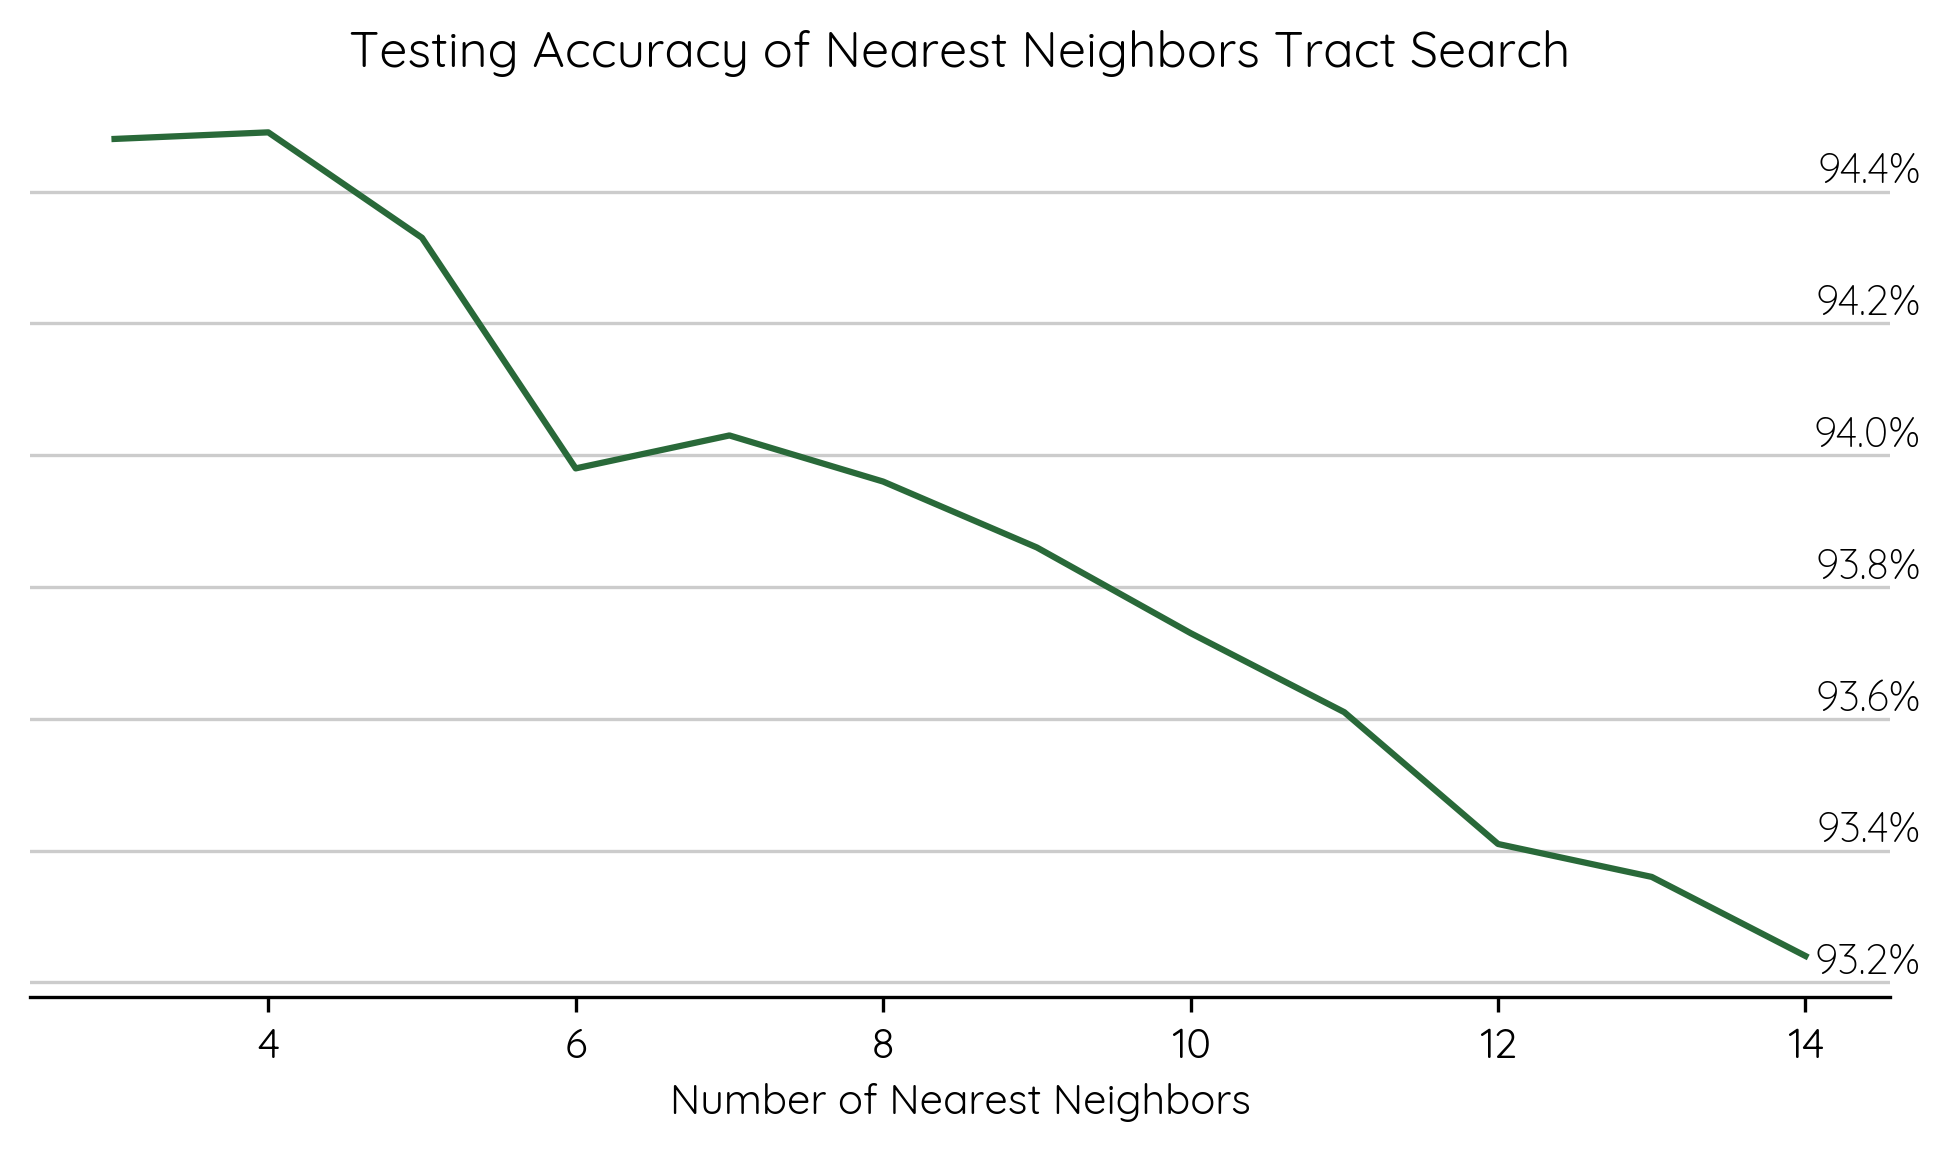

In [19]:
# create accuracy plot
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.family"] = main_font.get_name()

fig, ax = plt.subplots()
ax.plot(num_neighbors, [_ * 100 for _ in acc], color=palate["forest"],zorder = 2)
ax.spines[["top", "right", "left"]].set_visible(False)

#change grid
ax.grid(color = "gray", alpha = 0.4, axis  = "y", zorder=1)

#find positions
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()

#better y labels
ax.yaxis.set_ticks_position('none')
ax.yaxis.set_ticklabels([])

for label in np.arange(93.2,  94.41, 0.2):
    ax.text(right + 0.2, label, f"{label:0.1f}%", 
        color="black", 
        ha= "right", 
        va="bottom",
        font=main_font,
        fontsize = 10)

ax.set_title("Testing Accuracy of Nearest Neighbors Tract Search")
ax.set_xlabel("Number of Nearest Neighbors")
plt.savefig("../plots/NearestNeighbors.svg")

In [39]:
no_geoid = no_geoid.set_index("zip9")

predicted_geoids = {}
for zip9 in tqdm(no_geoid.index): 
    predicted_geoids[zip9] = (nearest_neighbors_match(zip9, 4))

pred_df = pd.DataFrame(predicted_geoids).T.rename(columns={0: "GEOID", 1: "difference"})
sodh["GEOID"] = sodh.GEOID.fillna(sodh.zip9.map(pred_df.GEOID))

  0%|          | 0/874228 [00:00<?, ?it/s]

In [64]:
no_geoid = sodh[sodh.GEOID.isna()]
no_geoid

,zip5,zip4,C_state,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,...,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,zip9,GEOID
16131,30007,0011,GA,2.0,3.0,48.0,2.0,1.0,6.0,4.0,...,4.0,5.0,4.0,3.0,2.0,4.0,5.0,2.0,300070011,NaN
16132,30007,0062,GA,4.0,4.0,17.0,1.0,1.0,4.0,4.0,...,5.0,3.0,4.0,4.0,3.0,2.0,3.0,1.0,300070062,NaN
16133,30007,0064,GA,5.0,4.0,48.0,3.0,1.0,4.0,4.0,...,6.0,6.0,7.0,5.0,3.0,2.0,3.0,1.0,300070064,NaN
16134,30007,0072,GA,3.0,3.0,49.0,5.0,2.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0,300070072,NaN
16135,30007,0092,GA,4.0,1.0,81.0,6.0,1.0,4.0,1.0,...,3.0,3.0,4.0,1.0,2.0,3.0,1.0,2.0,300070092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853013,39818,8533,GA,5.0,3.0,23.0,5.0,1.0,1.0,1.0,...,2.0,1.0,2.0,3.0,3.0,5.0,1.0,0.0,398188533,NaN
1853014,39818,8541,GA,4.0,3.0,62.0,3.0,1.0,6.0,6.0,...,4.0,5.0,3.0,3.0,2.0,3.0,6.0,2.0,398188541,NaN
1853015,39818,8542,GA,5.0,4.0,30.0,4.0,2.0,3.0,2.0,...,5.0,4.0,4.0,5.0,5.0,4.0,4.0,3.0,398188542,NaN
1853016,39818,8544,GA,3.0,7.0,2.0,1.0,1.0,3.0,3.0,...,5.0,4.0,3.0,4.0,4.0,1.0,5.0,1.0,398188544,NaN


In [79]:
sodh.GEOID = sodh.GEOID.apply(lambda x: x[:-2])

In [81]:
sodh.to_parquet("../data/SDoH.parquet")

In [84]:
for zip in no_geoid.zip5.unique(): 
    print(zip)

30007
30010
30017
30019
30023
30031
30036
30042
30045
30049
30072
30085
30095
30109
30112
30114
30115
30118
30119
30121
30123
30137
30142
30146
30148
30150
30151
30156
30160
30164
30169
30176
30177
30212
30218
30237
30251
30264
30271
30284
30291
30298
30304
30326
30333
30343
30346
30355
30356
30358
30362
30363
30448
30454
30460
30464
30475
30502
30514
30539
30545
30557
30562
30573
30598
30639
30703
30724
30732
30756
30757
31013
31025
31039
31083
31139
31141
31146
31150
31203
31304
31309
31310
31319
31327
31328
31402
31412
31502
31515
31523
31524
31527
31561
31739
31753
31758
31769
31799
31829
39818
